<a href="https://colab.research.google.com/github/Ayush-Singh2309/ML/blob/main/11_PostRead_Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content


- **Lift and Gain Charts**

- **Cheat sheet for which metric to use when**

- **Performance metric vs loss functions**





# **Lift and Gain Charts**

So far, we learnt about Precision, Recall, F1 score, ROC AUC and what not?

These metrics are good to evaluate the model and check its performance
- but they metric do not convey how a model would do business wise.

**How will the model impact the business ?**

These metrics are focusing on making sure making sure model are good at prediction
- but they don't help in translate it to business perspective

####What's the need ?

Business people need to know how our model's differences would make in the business term compared to random targeting.

For this purpose, **Lift and Gain chart** came into existence.

To convey/To measure how much better our prediction model compared without the model to the stakeholders.

#### Where are they used?

It is often used in target marketing.

Let's try understand the context

Suppose zomato wants to run a marketing campaigns
- But the customer response to these campaings are usually very low (1% in many cases)

But it cost money to run the campaign, right ?
- The company would like to save money
- at the same time, it would like to achieve the desired response from the customers

Taking an inspiration from this, in ML
- Lift and Gain chart help us graphically understand the benefit of using that model (in layman terms)



### How to make Lift and Gain chart ?

Suppose we built a classification model
- we have $D_{cv}$ (cross validation data)
- Ground truth $y_i$ (Assume 0 or 1)
- Predicted probability $ŷ_i$ (between 0 to 1)

**Step 1**: Obtain the $ŷ_i$ on $D_{cv}$

**Step 2**: Sort the data predicted probability in desc order
We will have highest probability at the top, lowest at the bottom.

**Step 3**: Break the sorted cross valdiation data into 10 groups (or deciles).

We get the data for each decile

**Step 4**: Using these deciles, we built a table as follows

<img src='https://drive.google.com/uc?id=13WglLrAbs8GWCghf80LQ2yxrTiGIkXBt'>


Let's assume the total data we have in validation set is 25,000

$D_{cv} = 25,000$ points

Now, after sorting these datapoints based on predicted probability, we split these into 10 deciles

**How many points will each decile or group will have ?**
=> 2500

As we sorted the data in desc order of predicted probability,
- 1st decile will have datapoints with highest pred. probability
- 10th decile will have datapoints with lowest pred. probability






## **Terminology**

<img src='https://drive.google.com/uc?id=1Pg6kk_sQ5fnwrLww2isu3btzWMYsj9Yb'>


### **Number of cases**
**Number of cases** means number of datapoints in each decile
     - As we have 10 decile and 25,000 pts
     - Each decile will have 2500 points

<br>

### **Number of Responses**

**Number of responses** means the total number of points with class label 1  (positive class)
- In first decile, out of 2500, we have 2179 points with class label 1
- As we go down to 10th , there are lesser number of datapoints belonging to class 1
  - It makes sense as data is sorted based on predicted probability

**observe**
- We have total of 4874 points belonging to class 1
- Out of 4874, approx half of them (2179) belong to 1st Decile

### **Cummulative Responses**

Using the **Number of responses**, we make **Cummulative Responses**
- **Cummulative Responses**, for a decile, is calcualted by summing up the number of positive (Responses) upto that decile
    - For 1st decile, Cummulative Responses $= 2179$
    - For 2nd decile, Cummulative Responses $= 2179 + 1753$

Similarly, we calculate cummulative responses for rest of the decile

**note:** The CR (Cummulative Responses) for last decile $=$ total number of responses.

<br>

### **% of events**

**% of events** of a decile tells us "of all the points belonging to positive class, how many of them belong to that decile":
- Total number of positive points are 4874
- Positive points in 1st decile is 2179
- % of events for 1st decile will be $(\frac{2179}{4874})\times 100 = 44.71$
- Similarly for 2nd decile, % of events = $\frac{1753}{4874} \times 100 = 35.97$


### **Gain**
Now, we calculate **Gain**:

- dividing the cummulative responses by total number of responses

- i.e. cummulative number of postives by total number of positives.

For 1st decile, gain will be $(\frac{2179}{4874}) \times 100 = 44.71$

For 2nd decile, gain will be $(\frac{3932}{4874}) \times 100 = 80.67$


#### **What does gain mean (in maths term)?**
Ans: Gain for ith decile tells us "what percentage of positive points are in $i^{th}$ or smaller decile"

- **For example:** For 8th decile, gain is 97.87 %. It means till 8th decile, we cover 97% of positive datapoints.

<br>

### **Cummulative Lift**

Imagine we have a random model

#### **How many number of response will there be for random model in 1st decile?**

Since it is random model, each decile will have 10% of total positive points or number of response

- number of response for 1st decile will be roughly 10% of 4874 $= 487.4$

For our model, we have $\frac{2179}{4874}\times 100 = 44$% of positive points (gain) in 1st decile

<br>


Now, **Cummulative lift** for a decile is calculated by
- dividing total % of positive point we have upto that decile (gain) for our model by total % of positive points if we had a random model
- in other terms, it is ratio of gain of our model to a gain of random model

For example:

cummulative lift for 1st decile will be
- $\frac{44.71}{10}$ → gain for model for 1st decile /gain for random model for 1st decile

Cummulative lift for 2nd decile will be
- $\frac{80.67}{20}$ → gain for model (2nd decile) / gain for random model in 2nd decile

<br>

#### **What does lift mean (in maths terms)?**

It means Cummulative percentage of positive points till ith decile divided by cummulative percentage of positive points by random model

It is intuitively telling how much better is model compared to random model.



#**Gain Chart**

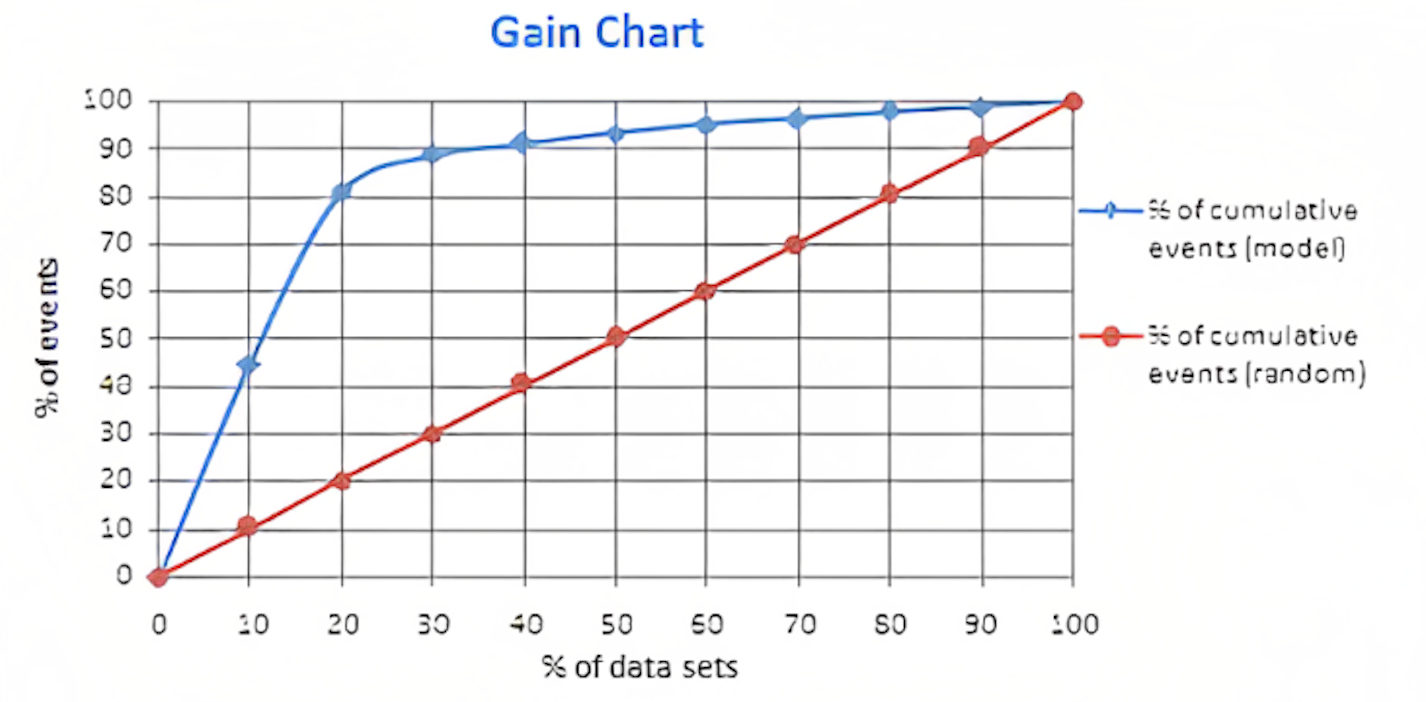

After calculating the gain and lift values, we plot them for each decile.



Let's look at Gain chart first:

Notice there are two curve in it
- Curve for our model (<font color = blue>blue</font>)
- Curve for random model (<font color = 'red'>red</font>)

As the gain for random model increases by 10 units for each decile, the curve we get for random model is a straight line @ 45 degrees.

#### How do we interpret gain chart ?

We have gain of approx 80 for second decible.

It means that approx 80% of targets can be covered by top 20% of data.

Suppose this was a Spam prediction model.
-In that case, we have identified and targeted approx 80% of Spam emails just by targeting top 20% of email data.

**What does it mean for business?**

Using fewer resources, we can avoid 80% of Spam in our inbox




# **Lift Chart**

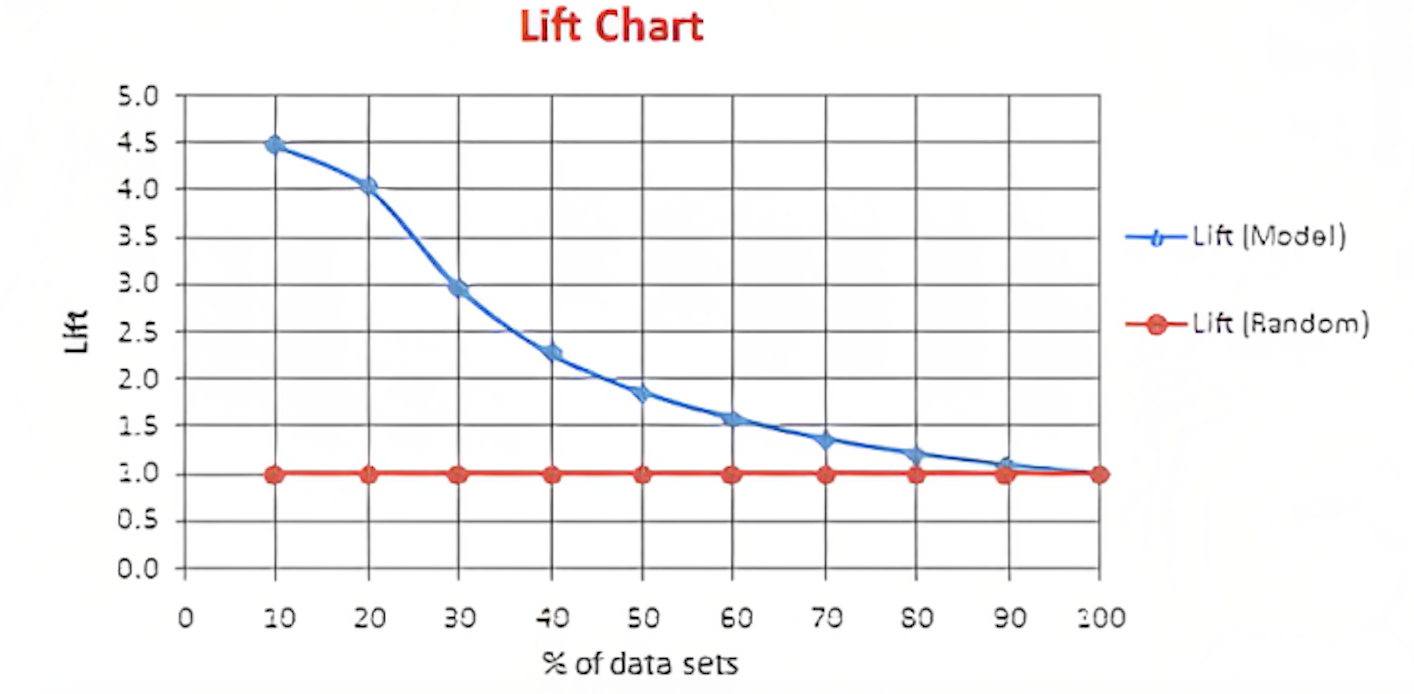



For calculating lift of decile, we simply divide gain of model by gain of random model

A random model will have a lift of 1 for each decile.
But, a good model will have lift as high as possible.

As you keep you keep coming to last decile, the lift will decrease
- eventually both model and random model will have lift of 1 for 10th decile

#### How do we interpret lift chart ?

The lift for 2nd decile is 4.

It means when selecting 20% of data based on model,
- we could find target (actual positives) 4 times more than the randomly selected 20% of the data without a model.

Note: The Greater the area between the Lift / Gain and Baseline, the Better the model.

# **Cheat sheat for which metric to use when**

- If we want probabilities of classes: Log loss
- If classes are balanced: Accuracy
- IF classes are imbalanced:
    - and if we are more concerned about False positive and true positive, then we use precision.
    - If we are more concerned about False Negatives and True positive then we use recall.
    - F1 score is a balance between precision and recall.
    - If our concern is both classes (true negative and true positive) then we use ROC_AUC
- If severe imbalance : PR AUC

#**Performance Metric vs Loss functions**

### Q. How are performance metric different than Loss functions?
Loss functions show a measure of model performance. They’re used to train a machine learning model (using some kind of optimization like Gradient Descent), and they’re usually differentiable in the model’s parameters.

Metrics are used to monitor and measure the performance of a model (during training and testing), and don’t need to be differentiable.

However, if for some tasks the performance metric is differentiable, it can also be used as a loss function (perhaps with some regularizations added to it), such as MSE.